In [ ]:
pip install face_recognition

In [ ]:
import face_recognition
import cv2

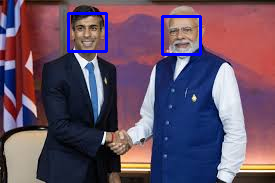

In [ ]:
import cv2

# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load a sample image
image_path = 'xyz.jpeg'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display the image with detected faces
from google.colab.patches import cv2_imshow
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import face_recognition
import os

# Load known faces and encodings
known_faces = []
known_names = []

# Directory containing images of known people
known_faces_dir = "abc.jpg"

# Load known faces from images in the directory
for filename in os.listdir(known_faces_dir):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        image_path = os.path.join(known_faces_dir, filename)
        image = face_recognition.load_image_file(image_path)
        face_encoding = face_recognition.face_encodings(image)[0]  # Assuming one face per image
        known_faces.append(face_encoding)
        known_names.append(os.path.splitext(filename)[0])  # Use filename as the name

# Load an unknown image for face recognition
unknown_image_path = "unknown.jpg"
unknown_image = face_recognition.load_image_file(unknown_image_path)
unknown_face_encodings = face_recognition.face_encodings(unknown_image)

# Iterate through unknown face encodings and compare with known faces
for unknown_face_encoding in unknown_face_encodings:
    # Compare face encoding with known faces
    matches = face_recognition.compare_faces(known_faces, unknown_face_encoding)

    name = "Unknown"  # Default name if no match found

    # If a match is found, use the known name
    if True in matches:
        matched_index = matches.index(True)
        name = known_names[matched_index]

    print(f"Detected face as: {name}")

# Display the unknown image with boxes around detected faces
import cv2

unknown_image_cv2 = cv2.imread(unknown_image_path)
face_locations = face_recognition.face_locations(unknown_image)
for top, right, bottom, left in face_locations:
    cv2.rectangle(unknown_image_cv2, (left, top), (right, bottom), (0, 255, 0), 2)

cv2_imshow(unknown_image_cv2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import torch
from torchvision import transforms
from torchvision.models.detection import faster_rcnn
from PIL import Image, ImageDraw

# Load pre-trained Faster R-CNN model
model = faster_rcnn.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load and preprocess the image
image_path = "abc.jpg"
image = Image.open(image_path)
transform = transforms.Compose([transforms.ToTensor()])
image_tensor = transform(image).unsqueeze(0)

# Perform inference
with torch.no_grad():
    prediction = model(image_tensor)

# Draw bounding boxes on the image
draw = ImageDraw.Draw(image)
for score, label, box in zip(prediction[0]['scores'], prediction[0]['labels'], prediction[0]['boxes']):
    if score > 0.5:  # You can adjust the threshold as needed
        box = [round(i, 2) for i in box.tolist()]
        draw.rectangle(box, outline="red", width=3)
        draw.text((box[0], box[1]), f"Label: {label.item()}", fill="red")

# Display or save the annotated image
image.show()
image.save("annotated_image.jpg")




/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
